<a href="https://colab.research.google.com/github/PhamTuNhi19146102/AI/blob/main/model_lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os

from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten,Activation
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping


from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

x_train = ImageDataGenerator(rescale=1/255)
x_test = ImageDataGenerator(rescale=1/255)

In [5]:
x_train_data = x_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/x_ray_detection_lung/x_ray detect/train",
    target_size=(350, 350),
    batch_size=3,
    class_mode='categorical',
    )
x_test_data = x_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/x_ray_detection_lung/x_ray detect/test",
    target_size=(350, 350),
    batch_size=3,
    class_mode= "categorical",
    )

Found 2458 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


In [6]:
x_train_data.class_indices

{'cancer': 0, 'normal': 1}

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Activation,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (350,350,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Activation('relu'))
model.add(Dense(2, activation = "softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 256)     7168      
                                                                 
 activation (Activation)     (None, 350, 350, 256)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 64)      147520    
                                                                 
 activation_1 (Activation)   (None, 175, 175, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 88, 64)       0         
 2D)                                                    

In [8]:
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD

from tensorflow.keras.optimizers import SGD
#opt = SGD(lr = 0.01, momentum= 0.9)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_data,
                  epochs=10,
                  batch_size=32,
                  verbose=1,
                  validation_data= x_test_data)

Epoch 1/10
820/820 [==============================] - 344s 405ms/step - loss: 0.2267 - accuracy: 0.9264 - val_loss: 0.1578 - val_accuracy: 0.9310
Epoch 2/10
820/820 [==============================] - 71s 87ms/step - loss: 0.1284 - accuracy: 0.9638 - val_loss: 0.1626 - val_accuracy: 0.9417
Epoch 3/10
820/820 [==============================] - 70s 86ms/step - loss: 0.1017 - accuracy: 0.9727 - val_loss: 0.1690 - val_accuracy: 0.9325
Epoch 4/10
820/820 [==============================] - 71s 87ms/step - loss: 0.0713 - accuracy: 0.9817 - val_loss: 0.2807 - val_accuracy: 0.9356
Epoch 5/10
820/820 [==============================] - 70s 85ms/step - loss: 0.0894 - accuracy: 0.9821 - val_loss: 0.1586 - val_accuracy: 0.9448
Epoch 6/10
820/820 [==============================] - 70s 85ms/step - loss: 0.0648 - accuracy: 0.9829 - val_loss: 0.2157 - val_accuracy: 0.9448
Epoch 7/10
820/820 [==============================] - 71s 86ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.2633 - val_accurac

In [9]:
model.save('lung_detect.h5') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper-left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


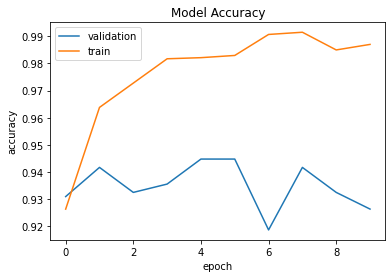

In [10]:
import matplotlib.pyplot as plt 
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation','train'], loc='upper-left')

expectation: cancer
với độ chính xác: 99 %
[0.9263628721237183, 0.9637917280197144, 0.9727420806884766, 0.9816924333572388, 0.9820992946624756, 0.9829129576683044, 0.990642786026001, 0.9914564490318298, 0.9849470853805542, 0.9869812726974487]


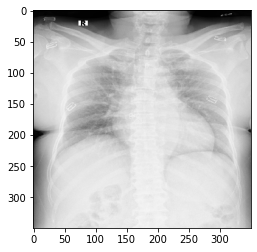

In [11]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
model5=load_model('lung_detect.h5')
from keras.preprocessing.image import load_img, img_to_array
labels = {0:'cancer',
          1: 'normal',
         }
img=load_img('/content/drive/MyDrive/x_ray_detection_lung/x_ray detect/test/cancer/e376386e1182881197fdc9a18a2bbbaa.jpg', target_size=(350,350)) #filename: link hinh anh
plt.imshow(img)
img=img_to_array(img)
img = img.reshape(1,350,350,3)
img=img.astype('float32')
img=img/255
img.shape
np.argmax(model5.predict(img),axis=1)
print('expectation:',labels[np.argmax(model5.predict(img))])
print('với độ chính xác:',int(np.max(history.history['accuracy'])*100),'%')
print(history.history['accuracy'])